# Stopnja kriminala v Sloveniji po letih v korelaciji z ostalimi podatki

Podatkovno Rudarjenje, 2022/23

**Sašo Primožič, Ambrož Perovšek, Andraž Adamič, Matija Ječnik**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
kd2010 = pd.read_csv("podatki/kd2010.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2011 = pd.read_csv("podatki/kd2011.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2012 = pd.read_csv("podatki/kd2012.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2014 = pd.read_csv("podatki/kd2014.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2015 = pd.read_csv("podatki/kd2015.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2017 = pd.read_csv("podatki/kd2017.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2018 = pd.read_csv("podatki/kd2018.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2019 = pd.read_csv("podatki/kd2019.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd = pd.concat([kd2010, kd2011, kd2012, kd2013, kd2014, kd2015, kd2016, kd2017, kd2018, kd2019], names=['letoVnosa'], keys=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',])
# kd = kd.drop("ZaporednaStevilkaKD", axis="columns")

/var/folders/p8/zvqyy09x6qv62ygx62vw6v7c0000gn/T/ipykernel_18780/969793939.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
/var/folders/p8/zvqyy09x6qv62ygx62vw6v7c0000gn/T/ipykernel_18780/969793939.py:7: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})


In [13]:
kd['MesecStoritve'] = pd.to_datetime(kd['MesecStoritve'], format='%m.%Y', exact=True)
kd = kd.rename(columns={'MesecStoritve': 'datumStoritve'})
kd.sort_values(by=['datumStoritve', 'UraStoritve'], inplace=True)
# kd.reset_index(drop=True, inplace=True)

<BarContainer object of 7 artists>

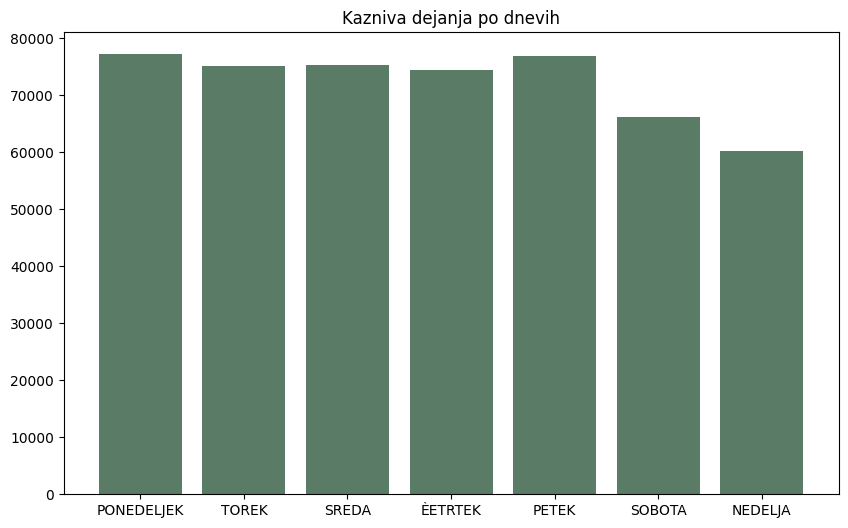

In [14]:
# print(kd[1:10])

dnevi = {}
for dan in ['PONEDELJEK', 'TOREK', 'SREDA', 'ÈETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']:
    dnevi[dan] = np.unique(np.asarray(kd.loc[kd['DanVTednu'] == dan, ['ZaporednaStevilkaKD']]))
# dnevi['SREDA'].size
plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja po dnevih')
plt.bar(dnevi.keys(), [d.size for d in dnevi.values()], color='#5A7B65')

<BarContainer object of 10 artists>

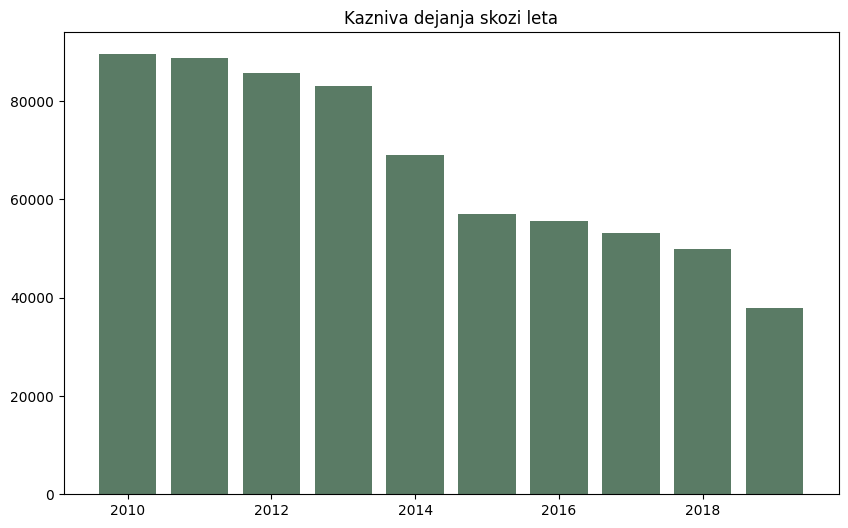

In [15]:
dan = []
for datum in range(2010, 2020):
    dan.append(np.unique(np.asarray(kd.loc[(kd['datumStoritve'] > str(datum) + '-01-01') & (kd['datumStoritve'] < str(datum + 1) + '-01-01'), ['ZaporednaStevilkaKD']])).size)

plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja skozi leta')
plt.bar(range(2010, 2020), dan, color='#5A7B65')

<BarContainer object of 2 artists>

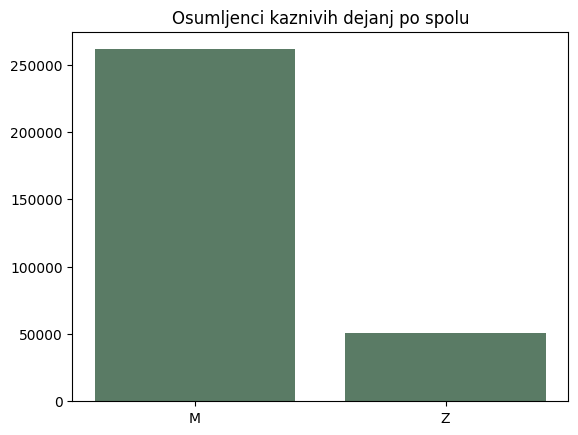

In [16]:
plt.title('Osumljenci kaznivih dejanj po spolu')
plt.bar(['M', 'Z'], [kd.query("Spol == 'MO\x8aKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size, kd.query("Spol == '\x8eENSKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size], color='#5A7B65')
# kd['VrstaOsebe'].unique()
# np.unique(np.asarray(kd.loc[(kd['Spol'] == 'MO\x8aKI'), ['ZaporednaStevilkaKD']])).size


<BarContainer object of 2 artists>

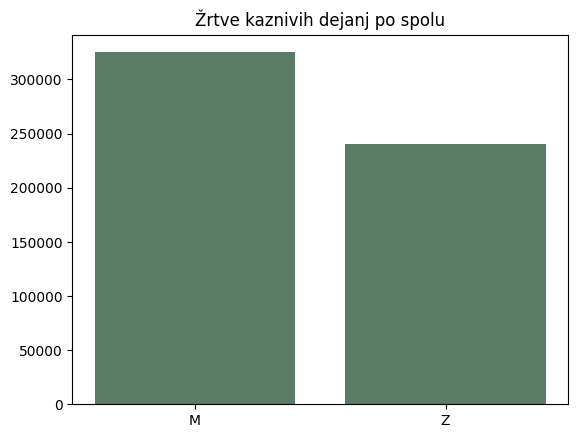

In [17]:
plt.title('Žrtve kaznivih dejanj po spolu')
plt.bar(['M', 'Z'], [kd.query("Spol == 'MO\x8aKI' & VrstaOsebe == '\x8eRTEV'")['Spol'].size, kd.query("Spol == '\x8eENSKI' & VrstaOsebe == '\x8eRTEV'")['Spol'].size], color='#5A7B65')

In [18]:
# # tole mi ni usec pa nwm ce se da kuko popravt
# l = {}
# k = list(kd['KriminalisticnaOznacba1'].unique())
# k.remove(k[34])
# k.remove(k[1149])

# for ko in k:
#     t = kd.query("Spol == 'MO\x8aKI' & VrstaOsebe == '\x8eRTEV' & KriminalisticnaOznacba1 == '" + ko + "'")['Spol'].size
#     if t > 7500:
#         l[ko] = t

# plt.bar(l.keys(), l.values())

<BarContainer object of 24 artists>

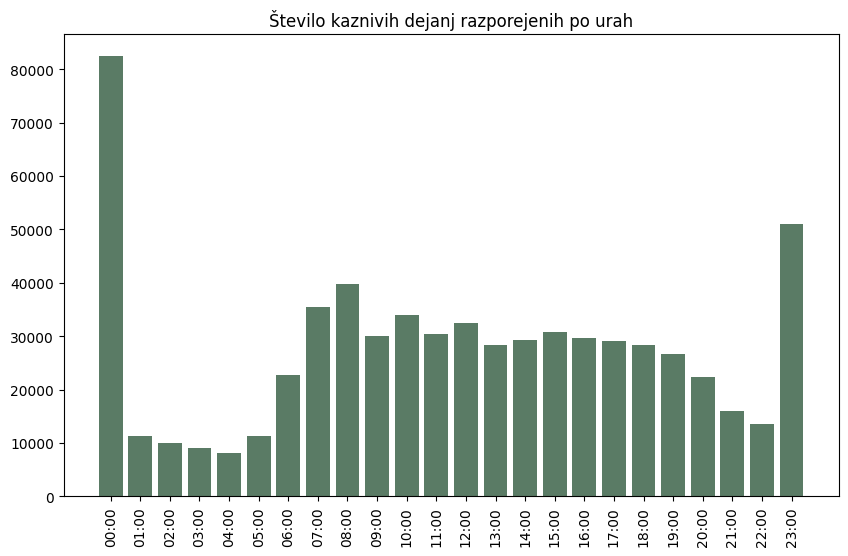

In [19]:
l = []
ure = sorted(kd['UraStoritve'].unique())
for u in ure:
    l.append(np.unique(np.asarray(kd.loc[kd["UraStoritve"] == u, ['ZaporednaStevilkaKD']])).size)

u = [x[:5] for x in ure]
# u.insert(0, " ")
# l.insert(0, 0)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Število kaznivih dejanj razporejenih po urah')
plt.bar(u, l, color='#5A7B65')